<img src="https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/agods/nyp_ago_logo.png" width='400'/>

# Lab 1 - Descriptive Statistics



By the end of this practical you will be able to apply descriptive statistics methods using Python


## Descriptive Statistics 

Descriptive statistics are numbers that are used to describe and summarize the data. They are used to describe the basic features of the data under consideration. They provide simple summary measures which give an overview of the dataset. Summary measures that are commonly used to describe a data set are measures of central tendency and measures of variability or dispersion. 


Measures of central tendency include the `mean`, `median` and `mode`. These measures summarize a given data set by providing a single data point. These measures describe the center position of a distribution for a data set. We analyze the frequency of each data point in the distribution and describes it using the mean, median or mode. They provide the average of a data set. They can be either a representation of entire population or a sample of the population.


Measures of variability or dispersion include the `variance` or `standard deviation`, `coefficient of variation`,  `minimum` and `maximum` values, `IQR (Interquartile Range)`,  `skewness and `kurtosis`. These measures help us to analyze how spread-out the distribution is for a dataset. So, they provide the shape of the data set.




### Understand the data source




The data set consists of revenue and profit figures of fortune 500 companies along with their rank.

In [ ]:
#import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!curl -O https://s3.amazonaws.com/dq-blog-files/fortune500.csv

In [ ]:
#use pandas_csv read the data source into python dataframe
data = 'fortune500.csv'

df = pd.read_csv(data)

In [ ]:
#View dimension of data source
df.shape

In [ ]:
#Preview the dataset
df.head()

In [ ]:
#View summary of dataset
df.info()

Observations

- We can see that the `Year` and `Rank` variables have integer data types as expected. The `Company` variable is of object data type. 

- The `Revenue (in millions)` variable is of float data type.

- The `Profit (in millions)` variable is of object data type. 

In [ ]:
#Descriptive or summary statistics in python – pandas, can be obtained by using the describe() function
df.describe()

We can see that the describe() function excludes the character columns and gives summary statistics of numeric columns only.



### Mean

The mean is the numerical average of the entire data set.

$$nums = \{ 872,  432,  397,  427,  388,  782, 397\}$$

$$mean = \Sigma nums / | nums |$$

In [ ]:

mean = df['Revenue (in millions)'].mean()

print(mean)


### Median

Median is the center (position) value in the ordered list.

$$nums = \{ 872, 432, 397, 427, 388, 782, 397\}  = \{ 388, 397, 397, \underline{427}, 432, 782, 872\}$$

$$median = 427$$

If the number of values in the data set is even, we take the average of the two center value. 

In [ ]:
median = df['Revenue (in millions)'].median()

print(median)

### Mode

Mode - the most frequent observation. If there is no repetition, no
  mode exists.
  
$$nums = \{ 872, \underline{432, 432, 432}, 388, 782, 388\}$$

$$mode = 432$$


In [ ]:
mode = df['Revenue (in millions)'].mode()

print(mode)

###Execrise 1

Can you tell the type of skewness for data in the column 'Revenue (in millions)'?

Draw distrubrition graph to verify the skewness.

In [ ]:
#Add code

####Solution


Observation


- We can see that `mean > median > mode`. So, the distribution of `Revenue (in millions)` is positively skewed. I will plot its distribution to confirm the same.

In [ ]:
data = df['Revenue (in millions)']

sns.distplot(data, bins=50, hist=True, kde=True, label = 'Revenue (in millions)')

### Variance

The variance measures how far each value in the data set is from the
mean.

Let $x$ denote the data set, $n$ be the size of the data, $\bar{x}$ denote the mean, variance $\sigma^2$ is defined as 
$$\sigma^2=\frac{\Sigma (x - \bar{x})^2}{n}$$


In [ ]:
df['Revenue (in millions)'].var()

### Standard deviation

The standard deviation measures the spread of the data about the mean
value. It is useful in comparing sets of data which may have the same
mean but a different range.  $\sigma$ is the standard deviation
Let $x$ denote the data set, $n$ be the size of the data, $\bar{x}$ denote the mean, standard deviation $\sigma$ is defined as 
$$\sigma=\sqrt{\frac{\Sigma (x - \bar{x})^2}{n}}$$



In [ ]:
df['Revenue (in millions)'].std()

###Execrise 2

Variance and standard deviation can help us understand if the data contains outliers. A low standard devation indicates that there are few or no outliers. A high standard deviation indicates there may be significant outliers.

> The following table shows the starting salary of a class of 20 geography graduates from the University of North Carolina in 1986. Person 7 is Michael Jordan, who became a professional basketball player upon graduating. Calculate the average salary for the class. Find the standard deviation of the salaries with and without Person 7 included. How different are they?
>
> <img src="https://i.imgur.com/cJHEEEt.png" width="240">
> 

In [ ]:
#Add code

####Solution

In [ ]:
#solution 1
import numpy as np
salaries = [22000, 21000, 26000, 31000, 19000, 21500, 800000, 24500, 25000, 24000]
salaries_woPerson7= [22000, 21000, 26000, 31000, 19000, 21500, 24500, 25000, 24000]

sd = np.std(salaries)
sd_woPerson7=np.std(salaries_woPerson7)
print(sd, sd_woPerson7)

In [ ]:
#solution 2
df_salaries=pd.DataFrame([22000, 21000, 26000, 31000, 19000, 21500, 800000, 24500, 25000, 24000])
df_salaries_woPerson7=pd.DataFrame([22000, 21000, 26000, 31000, 19000, 21500, 24500, 25000, 24000])
print(df_salaries.std(ddof=0), df_salaries_woPerson7.std(ddof=0))

Low SD indicates a low variability. It is ideal because it you can better predict information about the population based on sample data.
Hight SD indicates high variability means that the values are less consistent, so it’s harder to make predictions.


### Skewness


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html

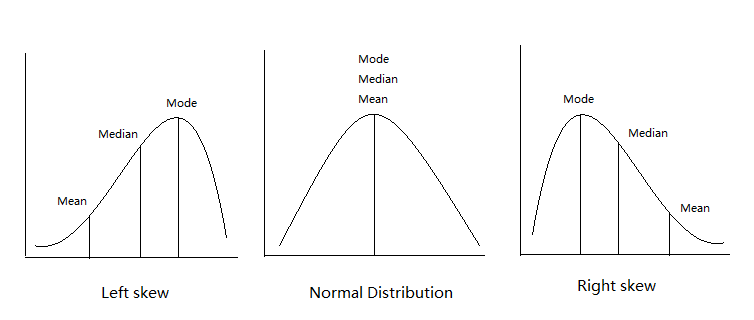




· In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero.

· When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.

· When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve

In [ ]:
df['Revenue (in millions)'].skew()

Interpretation

the skewness to be 9.3267. So, it is greater than 1. Hence, we can conclude that the `Revenue (in millions)` data is highly skewed right.

### Kurtosis
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html

In [ ]:
df['Revenue (in millions)'].kurt()
 

Interpretation

the kurtosis to be 132.0456. So, it is greater than 3 and so excess kurtosis > 0. Hence, we can conclude that the `Revenue (in millions)` curve is a leptokurtic curve. As compared to a normal distribution, its central peak is higher and sharper, and its tails are longer and fatter.

###Execrise 3

>The following table shows a summary of test scores for a class of students. 2 students scored 1 mark in the test, 3 students scored 2 marks, 8 students scored 3 marks and so on. Compute the mean, median and mode of the scores. Does the data skew towards one side or the other?
>
> <img src="https://i.imgur.com/AD7m3gJ.png" width="240">
> 

In [ ]:
#Add code


####Solution(execrise 3)

In [ ]:
import pandas as pd
score = {"score":[1,2,3,4,5,6,7,8,9,10],"No of students":[2,3,8,7,13,18,23,12,5,1]}
df = pd.DataFrame(score)
print(df)
listscore=[]
for index,row in df.iterrows():
  for i in range(row["No of students"]):
    listscore.append(row["score"])
print(listscore)

In [ ]:
df1=pd.DataFrame({"newscore" : listscore})

print("mean mode median")
print(df1["newscore"].mean())
print(df1["newscore"].mode()[0])
print(df1["newscore"].median())
# dataFrame.describe()

Mode> Median> Mean then the distribution is negatively skewed

In [ ]:

skewValue = df1["newscore"].skew() 

skewValue

Moderately negative skewed

###Execrise 4

Import the wage.csv and perform descriptive analysis

In [ ]:
#import wage.csv data source
#Add code

In [ ]:
#Display the first 10 rows of data
#Add code

In [ ]:
#Measures of central tendency for column age 

#Mean for the column age
#Add code

#Median for the column age
#Add code

#Mode for the column age
#Add code

In [ ]:
# summary statistics for all numerical columns
#Add code

In [ ]:
# Find the skewness and kurtosis of the column wage
#Add code

In [ ]:
#Give summary statistic of the age groupby eduction
#Add code

In [ ]:
#Give summary statistic of the wage groupby eduction
#Add code

####Solution(execrise 4)

In [ ]:
#import wage.csv data source
import pandas as pd
df = pd.read_csv("wage.csv")

In [ ]:
#Display the first 10 rows of data
df.head(10)

In [ ]:
#Measures of central tendency for column age 

#Mean for the column age
#Add code
mean=df["age"].mean()
print(mean)

#Median for the column age
#Add code
median=df["age"].median()
print(median)

#Mode for the column age
#Add code
mode=df['age'].mode()
print(mode)

In [ ]:
# summary statistics for all numerical columns
round(df.describe(),2)

In [ ]:
# Find the skewness and kurtosis of the column wage
#Add code
print("mean=",df["wage"].mean())
print("median=",df["wage"].median())
print("mode=",df["wage"].mode())

print("skew=", df["wage"].skew())
print("kurtosis=", df["wage"].kurt())


data = df['wage']
sns.distplot(data, bins=50, hist=True, kde=True, label = 'wage')

Observation-skewness

-	Positive values for skewness indicate positive skewness. 
-	The dataset are skewed or tail to right. 
-	By skewed right, we mean that the right tail is long relative to the left tail. 
-	The data values are concentrated in the right. 
-	So, there is a long tail to the right that is caused by extremely large values which pull the mean upward so that it is greater than the median. 
-	So, we have
       **Mean > Median > Mode**

Observation -  kurtosis

-	A distribution with kurtosis > 3 (**excess kurtosis** > 0) is called **leptokurtic**. 
-	As compared to a normal distribution, its central peak is higher and sharper, and its tails are longer and fatter.

In [ ]:
#Give summary statistic of the age groupby eduction
#Add code
df['age'].groupby(df['education']).describe()

In [ ]:
#Give summary statistic of the wage groupby eduction
#Add code
df['wage'].groupby(df['education']).describe()

### Correlation


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [ ]:
from pandas import DataFrame
import seaborn as sn

Data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

df = DataFrame(Data,columns=['A','B','C'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)


###Execrise 5

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

What are the important features that will affect the MEDV?


In [ ]:

#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()


In [ ]:
#Add code

####Solution

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()


The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no 
correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Correlation with output variable
cor_target = abs(cor["MEDV"])
print(cor_target)

In [ ]:
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV. Hence we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code  below.

In [ ]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

From the above code, it is seen that the variables RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.
After dropping RM, we are left with two feature, LSTAT and PTRATIO. 

###Data Transformation

####Log Transformation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.log(data)



#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

How to check the Log transformation help to improve the data distribution?
<details><summary>Click here for answer</summary> 
<br/>



```
df = pd.DataFrame(data)
df1 = pd.DataFrame(data_log)
print(df.skew())
print(df1.skew())
```
result

0    0.766207

dtype: float64

0   -0.554959

dtype: float64

Slight improvement from moderately skewed to aproximately skewed 

<br/>
</details>

In [ ]:
#Add code


####Square Transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
# data = np.random.beta(a=1, b=5, size=300)
data = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.sqrt(data)

df = pd.DataFrame(data)
df1 = pd.DataFrame(data_log)
print(df.skew())
print(df1.skew())

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')


Some improvement from moderately skewed to aproximately skewed

####Reciprocal Transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
# data = np.random.beta(a=1, b=5, size=300)
data = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.reciprocal(data)

df = pd.DataFrame(data)
df1 = pd.DataFrame(data_log)
print(df.skew())
print(df1.skew())

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('reciprocal  Transformed Data')

No improvement from moderately skewed. The new transformation become highly postively skewed.